In [80]:
import numpy as np
import pandas as pd
import requests
import re
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import seaborn as sn

%matplotlib inline

In [81]:
sn.set_style()

In [ ]:
facts_right = {}

right_url = 'https://mediabiasfactcheck.com/right/'
r = requests.get(right_url)
right_soup = BeautifulSoup(r.text)
right_sources = right_soup.find('div', {'class': 'entry clearfix'}).find_all('a', {'class': ''})
for source in right_sources:
    name = source.text
    _url = source['href']
    _r = requests.get(_url)
    _soup = BeautifulSoup(_r.text)

    for p in _soup.find('div', {'class': 'entry-content'}).find_all('p'):
        if p.text.startswith('Factual Reporting'):
            facts_right[name] = p.text.split(':')[-1].strip()
            break
    else:
        print('No factual reporting found for {:s}'.format(_url))

In [49]:
# correct a few incorrect/missing entries
facts_right['Ethics & Religious Liberty Commission\n'] = 'MIXED'
facts_right['American Center for Law & Justice (ACLJ)\n'] = 'MIXED'

In [38]:
facts_left = {}

right_url = 'https://mediabiasfactcheck.com/left/'
r = requests.get(right_url)
right_soup = BeautifulSoup(r.text)
right_sources = right_soup.find('div', {'class': 'entry clearfix'}).find_all('a', {'class': ''})
for source in right_sources:
    name = source.text
    _url = source['href']
    _r = requests.get(_url)
    _soup = BeautifulSoup(_r.text)

    for p in _soup.find('div', {'class': 'entry-content'}).find_all('p'):
        if p.text.startswith('Factual Reporting'):
            facts_left[name] = p.text.split(':')[-1].strip()
            break
    else:
        print('No factual reporting found for {:s}'.format(_url))

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 170 of the file /usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


No factual reporting found for http://mediabiasfactcheck.com/politicususa/


In [46]:
# fix four incorrect/missing entries
facts_left['PoliticusUSA'] = 'HIGH'
facts_left['Pravda Report\n'] = 'MIXED'
facts_left['Merry Jane\n'] = 'HIGH'
facts_left['Daily Record (Scotland)\n'] = 'MIXED'

In [50]:
set(facts_left.values())

{'HIGH', 'MIXED'}

In [51]:
set(facts_right.values())

{'HIGH', 'MIXED'}

In [54]:
left_count = Counter(facts_left.values())
right_count = Counter(facts_right.values())

In [57]:
print(left_count)
print(right_count)

Counter({'HIGH': 136, 'MIXED': 83})
Counter({'MIXED': 65, 'HIGH': 11})


In [79]:
text1 = "Percentage of left-leaning publications with High factual reporting score: {:0.1f}"
text2 = "Percentage of left-leaning publications with Mixed factual reporting score: {:0.1f}"

print(text1.format(100*left_count['HIGH']/sum(left_count.values())))
print(text2.format(100*left_count['MIXED']/sum(left_count.values())))

Percentage of left-leaning publications with High factual reporting score: 62.1
Percentage of left-leaning publications with Mixed factual reporting score: 37.9


In [77]:
text1 = "Percentage of right-leaning publications with High factual reporting score: {:0.1f}"
text2 = "Percentage of right-leaning publications with Mixed factual reporting score: {:0.1f}"

print(text1.format(100*right_count['HIGH']/sum(right_count.values())))
print(text2.format(100*right_count['MIXED']/sum(right_count.values())))

Percentage of right-leaning publications with High factual reporting score: 14.5
Percentage of right-leaning publications with Mixed factual reporting score: 85.5


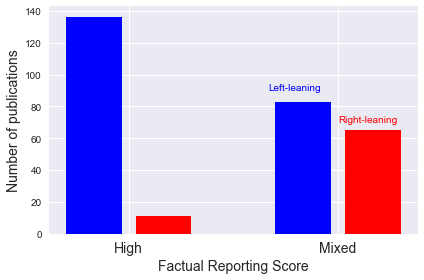

In [96]:
fig, axis = plt.subplots(1)

for i, value in enumerate(['HIGH', 'MIXED']):
    left = i*3
    
    axis.bar(left, left_count[value], color='Blue')
    axis.bar(left+1, right_count[value], color='Red')
   
axis.text(2.5, 90, 'Left-leaning', color='Blue')
axis.text(3.5, 70, 'Right-leaning', color='Red')

axis.set_xticks([0.5, 3.5])
axis.set_xticklabels(['High', 'Mixed'], fontsize=14)

axis.set_ylabel('Number of publications', fontsize=14)
axis.set_xlabel('Factual Reporting Score', fontsize=14)

fig.tight_layout()
fig.savefig('factual_reporting.jpeg', dpi=300, bbox_inches='tight')